In [2]:
%matplotlib inline

In [3]:
#!pip install tensorflow-addons

In [4]:
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import numpy as np

from itertools import tee
from sklearn.metrics import r2_score

In [5]:
def fun( x ):
    np.random.seed(685)
    noise = np.random.normal(0, 0.1, size=x.shape) # 1st arg: mean of the distribution, 2nd arg: Standard deviation of the distribution
    return np.power(x, 2) + noise

(100, 1) (100, 1)


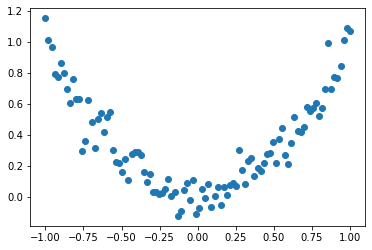

In [6]:
tf.random.set_seed(342)

# preparing dataset
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
#x = np.linspace(-1, 1, 100)[:, None]
#x = np.linspace(-1, 1, 100).reshape(-1,1)

# y =x^2
#y = np.power(x, 2) + noise 
y = fun(x)                         # shape (100, 1) + white noise

print(x.shape,y.shape)

# plot data
plt.scatter(x, y)
plt.show()

In [7]:
# Use these code in python > 3.10
#from itertools import tee, pairwise
#print( pairwise(df.iloc[:-1,0].items()) )

In [8]:
from itertools import tee
def pairwise(iterable):
    # pairwise('ABCDEFG') --> AB BC CD DE EF FG
    # copy iterable object, default n = 2
    a, b = tee(iterable, 2)
    # shift second iterable list
    next(b, None)
    # zip will concate two iterable objects, the length equals the shoest one.
    return zip(a, b)

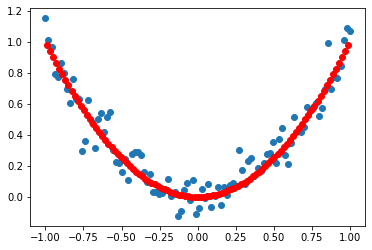

In [9]:
middle = []
formula_val = []
for e1, e2 in pairwise(x):
    middle.append( 0.5 * (e1+e2) )
    formula_val.append( ( 0.5 * (e1+e2))**2 )

x_val = np.array(middle)
y_val = np.array(formula_val)

plt.scatter(x, y)
plt.scatter(x_val, y_val, color='r')
plt.show()

![nn](https://i.imgur.com/AboATTY.png)

In [10]:
# Model Subclassing

class network(tf.keras.Model):
    def __init__(self):
        super(network,self).__init__()
        self.layer_1 = tf.keras.layers.Dense(2 , activation='relu')
        self.layer_2 = tf.keras.layers.Dense(3 , activation='relu')
        self.layer_3 = tf.keras.layers.Dense(3 , activation='relu')
        self.layer_4 = tf.keras.layers.Dense(2 , activation='relu')
        self.layer_5 = tf.keras.layers.Dense(1)
        
    def call(self,x):
        x_1 = self.layer_1(x)
        x_2 = self.layer_2(x_1)
        x_3 = self.layer_3(x_2)
        x_4 = self.layer_4(x_3)
        predict = self.layer_5(x_4)
        return predict

model_sub = network()


In [12]:
model_sub.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[ tf.keras.metrics.MeanAbsoluteError(),
        tf.keras.metrics.MeanSquaredError(), 
        tf.keras.metrics.RootMeanSquaredError()
        ],
)

In [13]:
print("Fit model on training data")

# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

history = model_sub.fit(
    x,
    y,
    batch_size=64,
    epochs=200,
    verbose=0,
    callbacks=[tqdm_callback],
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    #validation_data=(x_val, y_val),
)

Fit model on training data


Training:   0%|           0/1000 ETA: ?s,  ?epochs/s

Epoch 1/1000


2/2██████████ ETA: 00:00s - loss: 0.1118 - mean_absolute_error: 0.2433 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3343
Training:   0%|           1/1000 ETA: 28:13s,   1.70s/epochs

Epoch 2/1000


2/2██████████ ETA: 00:00s - loss: 0.1060 - mean_absolute_error: 0.2355 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.3256


Epoch 3/1000


2/2██████████ ETA: 00:00s - loss: 0.1003 - mean_absolute_error: 0.2278 - mean_squared_error: 0.1003 - root_mean_squared_error: 0.3167


Epoch 4/1000


2/2██████████ ETA: 00:00s - loss: 0.0953 - mean_absolute_error: 0.2209 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.3086


Epoch 5/1000


2/2██████████ ETA: 00:00s - loss: 0.0902 - mean_absolute_error: 0.2150 - mean_squared_error: 0.0902 - root_mean_squared_error: 0.3004


Epoch 6/1000


2/2██████████ ETA: 00:00s - loss: 0.0854 - mean_absolute_error: 0.2088 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2922


Epoch 7/1000


2/2██████████ ETA: 00:00s - loss: 0.0805 - mean_absolute_error: 0.2025 - mean_squared_error: 0.0805 - root_mean_squared_error: 0.2838
Training:   1%|           7/1000 ETA: 03:11s,   5.18epochs/s

Epoch 8/1000


2/2██████████ ETA: 00:00s - loss: 0.0762 - mean_absolute_error: 0.1972 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2760


Epoch 9/1000


2/2██████████ ETA: 00:00s - loss: 0.0724 - mean_absolute_error: 0.1926 - mean_squared_error: 0.0724 - root_mean_squared_error: 0.2690


Epoch 10/1000


2/2██████████ ETA: 00:00s - loss: 0.0685 - mean_absolute_error: 0.1878 - mean_squared_error: 0.0685 - root_mean_squared_error: 0.2617


Epoch 11/1000


2/2██████████ ETA: 00:00s - loss: 0.0652 - mean_absolute_error: 0.1846 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2553


Epoch 12/1000


2/2██████████ ETA: 00:00s - loss: 0.0617 - mean_absolute_error: 0.1809 - mean_squared_error: 0.0617 - root_mean_squared_error: 0.2484
Training:   1%|           12/1000 ETA: 01:43s,   9.58epochs/s

Epoch 13/1000


2/2██████████ ETA: 00:00s - loss: 0.0590 - mean_absolute_error: 0.1782 - mean_squared_error: 0.0590 - root_mean_squared_error: 0.2429


Epoch 14/1000


2/2██████████ ETA: 00:00s - loss: 0.0563 - mean_absolute_error: 0.1753 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2373


Epoch 15/1000


2/2██████████ ETA: 00:00s - loss: 0.0538 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2321


Epoch 16/1000


2/2██████████ ETA: 00:00s - loss: 0.0520 - mean_absolute_error: 0.1720 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2281


Epoch 17/1000


2/2██████████ ETA: 00:00s - loss: 0.0500 - mean_absolute_error: 0.1705 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2236
Training:   2%|▏          17/1000 ETA: 01:08s,  14.44epochs/s

Epoch 18/1000


2/2██████████ ETA: 00:00s - loss: 0.0487 - mean_absolute_error: 0.1699 - mean_squared_error: 0.0487 - root_mean_squared_error: 0.2208


Epoch 19/1000


2/2██████████ ETA: 00:00s - loss: 0.0473 - mean_absolute_error: 0.1689 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2175


Epoch 20/1000


2/2██████████ ETA: 00:00s - loss: 0.0460 - mean_absolute_error: 0.1680 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.2145


Epoch 21/1000


2/2██████████ ETA: 00:00s - loss: 0.0452 - mean_absolute_error: 0.1683 - mean_squared_error: 0.0452 - root_mean_squared_error: 0.2127


Epoch 22/1000


2/2██████████ ETA: 00:00s - loss: 0.0442 - mean_absolute_error: 0.1679 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.2103


Epoch 23/1000


2/2██████████ ETA: 00:00s - loss: 0.0439 - mean_absolute_error: 0.1688 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.2094
Training:   2%|▏          23/1000 ETA: 00:47s,  20.65epochs/s

Epoch 24/1000


2/2██████████ ETA: 00:00s - loss: 0.0432 - mean_absolute_error: 0.1690 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.2078


Epoch 25/1000


2/2██████████ ETA: 00:00s - loss: 0.0427 - mean_absolute_error: 0.1693 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.2067


Epoch 26/1000


2/2██████████ ETA: 00:00s - loss: 0.0424 - mean_absolute_error: 0.1698 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.2059


Epoch 27/1000


2/2██████████ ETA: 00:00s - loss: 0.0421 - mean_absolute_error: 0.1700 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.2052


Epoch 28/1000


2/2██████████ ETA: 00:00s - loss: 0.0418 - mean_absolute_error: 0.1698 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.2044
Training:   3%|▎          28/1000 ETA: 00:37s,  25.61epochs/s

Epoch 29/1000


2/2██████████ ETA: 00:00s - loss: 0.0414 - mean_absolute_error: 0.1697 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.2035


Epoch 30/1000


2/2██████████ ETA: 00:00s - loss: 0.0412 - mean_absolute_error: 0.1696 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.2031


Epoch 31/1000


2/2██████████ ETA: 00:00s - loss: 0.0409 - mean_absolute_error: 0.1692 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.2023


Epoch 32/1000


2/2██████████ ETA: 00:00s - loss: 0.0407 - mean_absolute_error: 0.1690 - mean_squared_error: 0.0407 - root_mean_squared_error: 0.2017


Epoch 33/1000


2/2██████████ ETA: 00:00s - loss: 0.0404 - mean_absolute_error: 0.1685 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.2010


Epoch 34/1000


2/2██████████ ETA: 00:00s - loss: 0.0401 - mean_absolute_error: 0.1680 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.2002
Training:   3%|▎          34/1000 ETA: 00:30s,  31.43epochs/s

Epoch 35/1000


2/2██████████ ETA: 00:00s - loss: 0.0398 - mean_absolute_error: 0.1674 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1996


Epoch 36/1000


2/2██████████ ETA: 00:00s - loss: 0.0395 - mean_absolute_error: 0.1667 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1988


Epoch 37/1000


2/2██████████ ETA: 00:00s - loss: 0.0392 - mean_absolute_error: 0.1659 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1980


Epoch 38/1000


2/2██████████ ETA: 00:00s - loss: 0.0388 - mean_absolute_error: 0.1650 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1971


Epoch 39/1000


2/2██████████ ETA: 00:00s - loss: 0.0385 - mean_absolute_error: 0.1641 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1962
Training:   4%|▍          39/1000 ETA: 00:27s,  35.33epochs/s

Epoch 40/1000


2/2██████████ ETA: 00:00s - loss: 0.0382 - mean_absolute_error: 0.1633 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1954


Epoch 41/1000


2/2██████████ ETA: 00:00s - loss: 0.0379 - mean_absolute_error: 0.1624 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1946


Epoch 42/1000


2/2██████████ ETA: 00:00s - loss: 0.0375 - mean_absolute_error: 0.1615 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1937


Epoch 43/1000


2/2██████████ ETA: 00:00s - loss: 0.0372 - mean_absolute_error: 0.1606 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1928


Epoch 44/1000


2/2██████████ ETA: 00:00s - loss: 0.0368 - mean_absolute_error: 0.1597 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1919


Epoch 45/1000


2/2██████████ ETA: 00:00s - loss: 0.0365 - mean_absolute_error: 0.1588 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1910
Training:   4%|▍          45/1000 ETA: 00:24s,  39.10epochs/s

Epoch 46/1000


2/2██████████ ETA: 00:00s - loss: 0.0361 - mean_absolute_error: 0.1578 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1901


Epoch 47/1000


2/2██████████ ETA: 00:00s - loss: 0.0358 - mean_absolute_error: 0.1568 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1892


Epoch 48/1000


2/2██████████ ETA: 00:00s - loss: 0.0354 - mean_absolute_error: 0.1558 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1883


Epoch 49/1000


2/2██████████ ETA: 00:00s - loss: 0.0351 - mean_absolute_error: 0.1547 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1873


Epoch 50/1000


2/2██████████ ETA: 00:00s - loss: 0.0348 - mean_absolute_error: 0.1537 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1864
Training:   5%|▌          50/1000 ETA: 00:23s,  41.25epochs/s

Epoch 51/1000


2/2██████████ ETA: 00:00s - loss: 0.0344 - mean_absolute_error: 0.1527 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1855


Epoch 52/1000


2/2██████████ ETA: 00:00s - loss: 0.0341 - mean_absolute_error: 0.1516 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1847


Epoch 53/1000


2/2██████████ ETA: 00:00s - loss: 0.0338 - mean_absolute_error: 0.1505 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1837


Epoch 54/1000


2/2██████████ ETA: 00:00s - loss: 0.0334 - mean_absolute_error: 0.1495 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1828


Epoch 55/1000


2/2██████████ ETA: 00:00s - loss: 0.0331 - mean_absolute_error: 0.1485 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1819


Epoch 56/1000


2/2██████████ ETA: 00:00s - loss: 0.0328 - mean_absolute_error: 0.1475 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1810
Training:   6%|▌          56/1000 ETA: 00:21s,  43.45epochs/s

Epoch 57/1000


2/2██████████ ETA: 00:00s - loss: 0.0324 - mean_absolute_error: 0.1465 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1801


Epoch 58/1000


2/2██████████ ETA: 00:00s - loss: 0.0321 - mean_absolute_error: 0.1456 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1792


Epoch 59/1000


2/2██████████ ETA: 00:00s - loss: 0.0318 - mean_absolute_error: 0.1448 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1783


Epoch 60/1000


2/2██████████ ETA: 00:00s - loss: 0.0314 - mean_absolute_error: 0.1438 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1772


Epoch 61/1000


2/2██████████ ETA: 00:00s - loss: 0.0311 - mean_absolute_error: 0.1428 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1763
Training:   6%|▌          61/1000 ETA: 00:20s,  44.95epochs/s

Epoch 62/1000


2/2██████████ ETA: 00:00s - loss: 0.0307 - mean_absolute_error: 0.1419 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1753


Epoch 63/1000


2/2██████████ ETA: 00:00s - loss: 0.0304 - mean_absolute_error: 0.1409 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1743


Epoch 64/1000


2/2██████████ ETA: 00:00s - loss: 0.0301 - mean_absolute_error: 0.1400 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1734


Epoch 65/1000


2/2██████████ ETA: 00:00s - loss: 0.0297 - mean_absolute_error: 0.1391 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1724


Epoch 66/1000


2/2██████████ ETA: 00:00s - loss: 0.0294 - mean_absolute_error: 0.1383 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1714
Training:   7%|▋          66/1000 ETA: 00:22s,  42.32epochs/s

Epoch 67/1000


2/2██████████ ETA: 00:00s - loss: 0.0290 - mean_absolute_error: 0.1374 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1704


Epoch 68/1000


2/2██████████ ETA: 00:00s - loss: 0.0287 - mean_absolute_error: 0.1366 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1693


Epoch 69/1000


2/2██████████ ETA: 00:00s - loss: 0.0283 - mean_absolute_error: 0.1357 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1683


Epoch 70/1000


2/2██████████ ETA: 00:00s - loss: 0.0280 - mean_absolute_error: 0.1349 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1674


Epoch 71/1000


2/2██████████ ETA: 00:00s - loss: 0.0277 - mean_absolute_error: 0.1342 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1664
Training:   7%|▋          71/1000 ETA: 00:21s,  43.81epochs/s

Epoch 72/1000


2/2██████████ ETA: 00:00s - loss: 0.0274 - mean_absolute_error: 0.1333 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1654


Epoch 73/1000


2/2██████████ ETA: 00:00s - loss: 0.0270 - mean_absolute_error: 0.1324 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1644


Epoch 74/1000


2/2██████████ ETA: 00:00s - loss: 0.0267 - mean_absolute_error: 0.1314 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1634


Epoch 75/1000


2/2██████████ ETA: 00:00s - loss: 0.0264 - mean_absolute_error: 0.1304 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1624


Epoch 76/1000


2/2██████████ ETA: 00:00s - loss: 0.0261 - mean_absolute_error: 0.1295 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1615


Epoch 77/1000


2/2██████████ ETA: 00:00s - loss: 0.0257 - mean_absolute_error: 0.1285 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1604
Training:   8%|▊          77/1000 ETA: 00:19s,  46.57epochs/s

Epoch 78/1000


2/2██████████ ETA: 00:00s - loss: 0.0254 - mean_absolute_error: 0.1275 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1594


Epoch 79/1000


2/2██████████ ETA: 00:00s - loss: 0.0251 - mean_absolute_error: 0.1266 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1585


Epoch 80/1000


2/2██████████ ETA: 00:00s - loss: 0.0248 - mean_absolute_error: 0.1256 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1575


Epoch 81/1000


2/2██████████ ETA: 00:00s - loss: 0.0245 - mean_absolute_error: 0.1247 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1565


Epoch 82/1000


2/2██████████ ETA: 00:00s - loss: 0.0242 - mean_absolute_error: 0.1237 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1555
Training:   8%|▊          82/1000 ETA: 00:19s,  47.36epochs/s

Epoch 83/1000


2/2██████████ ETA: 00:00s - loss: 0.0239 - mean_absolute_error: 0.1228 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1546


Epoch 84/1000


2/2██████████ ETA: 00:00s - loss: 0.0236 - mean_absolute_error: 0.1218 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1536


Epoch 85/1000


2/2██████████ ETA: 00:00s - loss: 0.0233 - mean_absolute_error: 0.1210 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1526


Epoch 86/1000


2/2██████████ ETA: 00:00s - loss: 0.0230 - mean_absolute_error: 0.1202 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1517


Epoch 87/1000


2/2██████████ ETA: 00:00s - loss: 0.0227 - mean_absolute_error: 0.1192 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1506


Epoch 88/1000


2/2██████████ ETA: 00:00s - loss: 0.0224 - mean_absolute_error: 0.1184 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1497
Training:   9%|▉          88/1000 ETA: 00:18s,  49.22epochs/s

Epoch 89/1000


2/2██████████ ETA: 00:00s - loss: 0.0221 - mean_absolute_error: 0.1176 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1487


Epoch 90/1000


2/2██████████ ETA: 00:00s - loss: 0.0218 - mean_absolute_error: 0.1168 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1478


Epoch 91/1000


2/2██████████ ETA: 00:00s - loss: 0.0216 - mean_absolute_error: 0.1159 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1468


Epoch 92/1000


2/2██████████ ETA: 00:00s - loss: 0.0212 - mean_absolute_error: 0.1149 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1458


Epoch 93/1000


2/2██████████ ETA: 00:00s - loss: 0.0210 - mean_absolute_error: 0.1139 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1448


Epoch 94/1000


2/2██████████ ETA: 00:00s - loss: 0.0207 - mean_absolute_error: 0.1129 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1438
Training:   9%|▉          94/1000 ETA: 00:18s,  50.26epochs/s

Epoch 95/1000


2/2██████████ ETA: 00:00s - loss: 0.0204 - mean_absolute_error: 0.1119 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1428


Epoch 96/1000


2/2██████████ ETA: 00:00s - loss: 0.0201 - mean_absolute_error: 0.1109 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1418


Epoch 97/1000


2/2██████████ ETA: 00:00s - loss: 0.0198 - mean_absolute_error: 0.1097 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1407


Epoch 98/1000


2/2██████████ ETA: 00:00s - loss: 0.0195 - mean_absolute_error: 0.1087 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1397


Epoch 99/1000


2/2██████████ ETA: 00:00s - loss: 0.0192 - mean_absolute_error: 0.1075 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1386


Epoch 100/1000


2/2██████████ ETA: 00:00s - loss: 0.0189 - mean_absolute_error: 0.1064 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1374
Training:  10%|█          100/1000 ETA: 00:18s,  49.70epochs/s

Epoch 101/1000


2/2██████████ ETA: 00:00s - loss: 0.0186 - mean_absolute_error: 0.1053 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1363


Epoch 102/1000


2/2██████████ ETA: 00:00s - loss: 0.0183 - mean_absolute_error: 0.1041 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1351


Epoch 103/1000


2/2██████████ ETA: 00:00s - loss: 0.0179 - mean_absolute_error: 0.1031 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1338


Epoch 104/1000


2/2██████████ ETA: 00:00s - loss: 0.0176 - mean_absolute_error: 0.1020 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1326


Epoch 105/1000


2/2██████████ ETA: 00:00s - loss: 0.0172 - mean_absolute_error: 0.1010 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1313


Epoch 106/1000


2/2██████████ ETA: 00:00s - loss: 0.0169 - mean_absolute_error: 0.1002 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1302
Training:  11%|█          106/1000 ETA: 00:17s,  50.21epochs/s

Epoch 107/1000


2/2██████████ ETA: 00:00s - loss: 0.0167 - mean_absolute_error: 0.0994 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1291


Epoch 108/1000


2/2██████████ ETA: 00:00s - loss: 0.0165 - mean_absolute_error: 0.0988 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1284


Epoch 109/1000


2/2██████████ ETA: 00:00s - loss: 0.0163 - mean_absolute_error: 0.0985 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1277


Epoch 110/1000


2/2██████████ ETA: 00:00s - loss: 0.0161 - mean_absolute_error: 0.0980 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1270


Epoch 111/1000


2/2██████████ ETA: 00:00s - loss: 0.0159 - mean_absolute_error: 0.0975 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1262


Epoch 112/1000


2/2██████████ ETA: 00:00s - loss: 0.0157 - mean_absolute_error: 0.0970 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1254
Training:  11%|█          112/1000 ETA: 00:17s,  49.87epochs/s

Epoch 113/1000


2/2██████████ ETA: 00:00s - loss: 0.0156 - mean_absolute_error: 0.0967 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1248


Epoch 114/1000


2/2██████████ ETA: 00:00s - loss: 0.0153 - mean_absolute_error: 0.0960 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1239


Epoch 115/1000


2/2██████████ ETA: 00:00s - loss: 0.0152 - mean_absolute_error: 0.0955 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1234


Epoch 116/1000


2/2██████████ ETA: 00:00s - loss: 0.0151 - mean_absolute_error: 0.0950 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1227


Epoch 117/1000


2/2██████████ ETA: 00:00s - loss: 0.0149 - mean_absolute_error: 0.0944 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1222


Epoch 118/1000


2/2██████████ ETA: 00:00s - loss: 0.0148 - mean_absolute_error: 0.0937 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1215
Training:  12%|█▏         118/1000 ETA: 00:19s,  46.40epochs/s

Epoch 119/1000


2/2██████████ ETA: 00:00s - loss: 0.0146 - mean_absolute_error: 0.0931 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1210


Epoch 120/1000


2/2██████████ ETA: 00:00s - loss: 0.0145 - mean_absolute_error: 0.0927 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1206


Epoch 121/1000


2/2██████████ ETA: 00:00s - loss: 0.0144 - mean_absolute_error: 0.0923 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1201


Epoch 122/1000


2/2██████████ ETA: 00:00s - loss: 0.0143 - mean_absolute_error: 0.0919 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1197


Epoch 123/1000


2/2██████████ ETA: 00:00s - loss: 0.0142 - mean_absolute_error: 0.0915 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1192
Training:  12%|█▏         123/1000 ETA: 00:18s,  47.03epochs/s

Epoch 124/1000


2/2██████████ ETA: 00:00s - loss: 0.0141 - mean_absolute_error: 0.0910 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1187


Epoch 125/1000


2/2██████████ ETA: 00:00s - loss: 0.0140 - mean_absolute_error: 0.0907 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1183


Epoch 126/1000


2/2██████████ ETA: 00:00s - loss: 0.0139 - mean_absolute_error: 0.0904 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1179


Epoch 127/1000


2/2██████████ ETA: 00:00s - loss: 0.0138 - mean_absolute_error: 0.0900 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1174


Epoch 128/1000


2/2██████████ ETA: 00:00s - loss: 0.0137 - mean_absolute_error: 0.0898 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1171
Training:  13%|█▎         128/1000 ETA: 00:18s,  47.49epochs/s

Epoch 129/1000


2/2██████████ ETA: 00:00s - loss: 0.0136 - mean_absolute_error: 0.0895 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1167


Epoch 130/1000


2/2██████████ ETA: 00:00s - loss: 0.0136 - mean_absolute_error: 0.0893 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1164


Epoch 131/1000


2/2██████████ ETA: 00:00s - loss: 0.0135 - mean_absolute_error: 0.0890 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1161


Epoch 132/1000


2/2██████████ ETA: 00:00s - loss: 0.0134 - mean_absolute_error: 0.0887 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1158


Epoch 133/1000


2/2██████████ ETA: 00:00s - loss: 0.0133 - mean_absolute_error: 0.0884 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1154
Training:  13%|█▎         133/1000 ETA: 00:18s,  47.40epochs/s

Epoch 134/1000


2/2██████████ ETA: 00:00s - loss: 0.0132 - mean_absolute_error: 0.0881 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1151


Epoch 135/1000


2/2██████████ ETA: 00:00s - loss: 0.0132 - mean_absolute_error: 0.0879 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1149


Epoch 136/1000


2/2██████████ ETA: 00:00s - loss: 0.0132 - mean_absolute_error: 0.0877 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1147


Epoch 137/1000


2/2██████████ ETA: 00:00s - loss: 0.0131 - mean_absolute_error: 0.0874 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1144


Epoch 138/1000


2/2██████████ ETA: 00:00s - loss: 0.0130 - mean_absolute_error: 0.0872 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1141
Training:  14%|█▍         138/1000 ETA: 00:18s,  47.63epochs/s

Epoch 139/1000


2/2██████████ ETA: 00:00s - loss: 0.0130 - mean_absolute_error: 0.0870 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1139


Epoch 140/1000


2/2██████████ ETA: 00:00s - loss: 0.0129 - mean_absolute_error: 0.0866 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1136


Epoch 141/1000


2/2██████████ ETA: 00:00s - loss: 0.0129 - mean_absolute_error: 0.0864 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1134


Epoch 142/1000


2/2██████████ ETA: 00:00s - loss: 0.0128 - mean_absolute_error: 0.0862 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1131


Epoch 143/1000


2/2██████████ ETA: 00:00s - loss: 0.0128 - mean_absolute_error: 0.0860 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1130
Training:  14%|█▍         143/1000 ETA: 00:18s,  46.03epochs/s

Epoch 144/1000


2/2██████████ ETA: 00:00s - loss: 0.0127 - mean_absolute_error: 0.0858 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1127


Epoch 145/1000


2/2██████████ ETA: 00:00s - loss: 0.0127 - mean_absolute_error: 0.0856 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1125


Epoch 146/1000


2/2██████████ ETA: 00:00s - loss: 0.0126 - mean_absolute_error: 0.0855 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1123


Epoch 147/1000


2/2██████████ ETA: 00:00s - loss: 0.0126 - mean_absolute_error: 0.0853 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1121


Epoch 148/1000


2/2██████████ ETA: 00:00s - loss: 0.0125 - mean_absolute_error: 0.0850 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1119
Training:  15%|█▍         148/1000 ETA: 00:18s,  45.83epochs/s

Epoch 149/1000


2/2██████████ ETA: 00:00s - loss: 0.0125 - mean_absolute_error: 0.0848 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1117


Epoch 150/1000


2/2██████████ ETA: 00:00s - loss: 0.0124 - mean_absolute_error: 0.0846 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1115


Epoch 151/1000


2/2██████████ ETA: 00:00s - loss: 0.0124 - mean_absolute_error: 0.0844 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1113


Epoch 152/1000


2/2██████████ ETA: 00:00s - loss: 0.0124 - mean_absolute_error: 0.0842 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1112


Epoch 153/1000


2/2██████████ ETA: 00:00s - loss: 0.0123 - mean_absolute_error: 0.0840 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1109
Training:  15%|█▌         153/1000 ETA: 00:18s,  46.54epochs/s

Epoch 154/1000


2/2██████████ ETA: 00:00s - loss: 0.0123 - mean_absolute_error: 0.0838 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1108


Epoch 155/1000


2/2██████████ ETA: 00:00s - loss: 0.0122 - mean_absolute_error: 0.0837 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1106


Epoch 156/1000


2/2██████████ ETA: 00:00s - loss: 0.0122 - mean_absolute_error: 0.0834 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1103


Epoch 157/1000


2/2██████████ ETA: 00:00s - loss: 0.0121 - mean_absolute_error: 0.0833 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1101


Epoch 158/1000


2/2██████████ ETA: 00:00s - loss: 0.0121 - mean_absolute_error: 0.0831 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1100
Training:  16%|█▌         158/1000 ETA: 00:18s,  46.05epochs/s

Epoch 159/1000


2/2██████████ ETA: 00:00s - loss: 0.0120 - mean_absolute_error: 0.0829 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1098


Epoch 160/1000


2/2██████████ ETA: 00:00s - loss: 0.0120 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1095


Epoch 161/1000


2/2██████████ ETA: 00:00s - loss: 0.0119 - mean_absolute_error: 0.0826 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1093


Epoch 162/1000


2/2██████████ ETA: 00:00s - loss: 0.0119 - mean_absolute_error: 0.0824 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1091


Epoch 163/1000


2/2██████████ ETA: 00:00s - loss: 0.0119 - mean_absolute_error: 0.0823 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1089
Training:  16%|█▋         163/1000 ETA: 00:18s,  46.06epochs/s

Epoch 164/1000


2/2██████████ ETA: 00:00s - loss: 0.0118 - mean_absolute_error: 0.0821 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1086


Epoch 165/1000


2/2██████████ ETA: 00:00s - loss: 0.0118 - mean_absolute_error: 0.0819 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1084


Epoch 166/1000


2/2██████████ ETA: 00:00s - loss: 0.0117 - mean_absolute_error: 0.0817 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1082


Epoch 167/1000


2/2██████████ ETA: 00:00s - loss: 0.0117 - mean_absolute_error: 0.0817 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1080


Epoch 168/1000


2/2██████████ ETA: 00:00s - loss: 0.0116 - mean_absolute_error: 0.0815 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1078
Training:  17%|█▋         168/1000 ETA: 00:18s,  45.37epochs/s

Epoch 169/1000


2/2██████████ ETA: 00:00s - loss: 0.0116 - mean_absolute_error: 0.0814 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1076


Epoch 170/1000


2/2██████████ ETA: 00:00s - loss: 0.0115 - mean_absolute_error: 0.0814 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1074


Epoch 171/1000


2/2██████████ ETA: 00:00s - loss: 0.0115 - mean_absolute_error: 0.0812 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1072


Epoch 172/1000


2/2██████████ ETA: 00:00s - loss: 0.0115 - mean_absolute_error: 0.0811 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1071


Epoch 173/1000


2/2██████████ ETA: 00:00s - loss: 0.0114 - mean_absolute_error: 0.0810 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1068
Training:  17%|█▋         173/1000 ETA: 00:18s,  45.70epochs/s

Epoch 174/1000


2/2██████████ ETA: 00:00s - loss: 0.0114 - mean_absolute_error: 0.0809 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1067


Epoch 175/1000


2/2██████████ ETA: 00:00s - loss: 0.0113 - mean_absolute_error: 0.0808 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1065


Epoch 176/1000


2/2██████████ ETA: 00:00s - loss: 0.0113 - mean_absolute_error: 0.0807 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1063


Epoch 177/1000


2/2██████████ ETA: 00:00s - loss: 0.0113 - mean_absolute_error: 0.0805 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1061


Epoch 178/1000


2/2██████████ ETA: 00:00s - loss: 0.0112 - mean_absolute_error: 0.0804 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1060


Epoch 179/1000


2/2██████████ ETA: 00:00s - loss: 0.0112 - mean_absolute_error: 0.0803 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1058
Training:  18%|█▊         179/1000 ETA: 00:17s,  47.07epochs/s

Epoch 180/1000


2/2██████████ ETA: 00:00s - loss: 0.0111 - mean_absolute_error: 0.0800 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1056


Epoch 181/1000


2/2██████████ ETA: 00:00s - loss: 0.0111 - mean_absolute_error: 0.0798 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1054


Epoch 182/1000


2/2██████████ ETA: 00:00s - loss: 0.0111 - mean_absolute_error: 0.0795 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1051


Epoch 183/1000


2/2██████████ ETA: 00:00s - loss: 0.0110 - mean_absolute_error: 0.0793 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1049


Epoch 184/1000


2/2██████████ ETA: 00:00s - loss: 0.0110 - mean_absolute_error: 0.0791 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1048
Training:  18%|█▊         184/1000 ETA: 00:17s,  46.83epochs/s

Epoch 185/1000


2/2██████████ ETA: 00:00s - loss: 0.0109 - mean_absolute_error: 0.0790 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1046


Epoch 186/1000


2/2██████████ ETA: 00:00s - loss: 0.0109 - mean_absolute_error: 0.0788 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1044


Epoch 187/1000


2/2██████████ ETA: 00:00s - loss: 0.0109 - mean_absolute_error: 0.0788 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1043


Epoch 188/1000


2/2██████████ ETA: 00:00s - loss: 0.0108 - mean_absolute_error: 0.0785 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1040


Epoch 189/1000


2/2██████████ ETA: 00:00s - loss: 0.0108 - mean_absolute_error: 0.0783 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1039


Epoch 190/1000


2/2██████████ ETA: 00:00s - loss: 0.0107 - mean_absolute_error: 0.0781 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1037
Training:  19%|█▉         190/1000 ETA: 00:16s,  48.39epochs/s

Epoch 191/1000


2/2██████████ ETA: 00:00s - loss: 0.0107 - mean_absolute_error: 0.0780 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1035


Epoch 192/1000


2/2██████████ ETA: 00:00s - loss: 0.0107 - mean_absolute_error: 0.0778 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1034


Epoch 193/1000


2/2██████████ ETA: 00:00s - loss: 0.0107 - mean_absolute_error: 0.0777 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1033


Epoch 194/1000


2/2██████████ ETA: 00:00s - loss: 0.0106 - mean_absolute_error: 0.0774 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1031


Epoch 195/1000


2/2██████████ ETA: 00:00s - loss: 0.0106 - mean_absolute_error: 0.0772 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1029
Training:  20%|█▉         195/1000 ETA: 00:16s,  48.50epochs/s

Epoch 196/1000


2/2██████████ ETA: 00:00s - loss: 0.0105 - mean_absolute_error: 0.0771 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1027


Epoch 197/1000


2/2██████████ ETA: 00:00s - loss: 0.0105 - mean_absolute_error: 0.0770 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1026


Epoch 198/1000


2/2██████████ ETA: 00:00s - loss: 0.0105 - mean_absolute_error: 0.0770 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1025


Epoch 199/1000


2/2██████████ ETA: 00:00s - loss: 0.0105 - mean_absolute_error: 0.0769 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1023


Epoch 200/1000


2/2██████████ ETA: 00:00s - loss: 0.0104 - mean_absolute_error: 0.0768 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1022
Training:  20%|██         200/1000 ETA: 00:18s,  43.42epochs/s

Epoch 201/1000


2/2██████████ ETA: 00:00s - loss: 0.0104 - mean_absolute_error: 0.0768 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1021


Epoch 202/1000


2/2██████████ ETA: 00:00s - loss: 0.0104 - mean_absolute_error: 0.0767 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1020


Epoch 203/1000


2/2██████████ ETA: 00:00s - loss: 0.0104 - mean_absolute_error: 0.0766 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1018


Epoch 204/1000


2/2██████████ ETA: 00:00s - loss: 0.0104 - mean_absolute_error: 0.0766 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1018


Epoch 205/1000


2/2██████████ ETA: 00:00s - loss: 0.0103 - mean_absolute_error: 0.0765 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1016
Training:  20%|██         205/1000 ETA: 00:18s,  43.92epochs/s

Epoch 206/1000


2/2██████████ ETA: 00:00s - loss: 0.0103 - mean_absolute_error: 0.0764 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1015


Epoch 207/1000


2/2██████████ ETA: 00:00s - loss: 0.0103 - mean_absolute_error: 0.0763 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1014


Epoch 208/1000


2/2██████████ ETA: 00:00s - loss: 0.0103 - mean_absolute_error: 0.0763 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1013


Epoch 209/1000


2/2██████████ ETA: 00:00s - loss: 0.0102 - mean_absolute_error: 0.0763 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1012


Epoch 210/1000


2/2██████████ ETA: 00:00s - loss: 0.0102 - mean_absolute_error: 0.0763 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1010
Training:  21%|██         210/1000 ETA: 00:17s,  44.17epochs/s

Epoch 211/1000


2/2██████████ ETA: 00:00s - loss: 0.0102 - mean_absolute_error: 0.0763 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1010


Epoch 212/1000


2/2██████████ ETA: 00:00s - loss: 0.0102 - mean_absolute_error: 0.0762 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1008


Epoch 213/1000


2/2██████████ ETA: 00:00s - loss: 0.0101 - mean_absolute_error: 0.0761 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1007


Epoch 214/1000


2/2██████████ ETA: 00:00s - loss: 0.0101 - mean_absolute_error: 0.0762 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1007


Epoch 215/1000


2/2██████████ ETA: 00:00s - loss: 0.0101 - mean_absolute_error: 0.0762 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006
Training:  22%|██▏        215/1000 ETA: 00:17s,  44.19epochs/s

Epoch 216/1000


2/2██████████ ETA: 00:00s - loss: 0.0101 - mean_absolute_error: 0.0761 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005


Epoch 217/1000


2/2██████████ ETA: 00:00s - loss: 0.0101 - mean_absolute_error: 0.0760 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004


Epoch 218/1000


2/2██████████ ETA: 00:00s - loss: 0.0101 - mean_absolute_error: 0.0760 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003


Epoch 219/1000


2/2██████████ ETA: 00:00s - loss: 0.0100 - mean_absolute_error: 0.0759 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002


Epoch 220/1000


2/2██████████ ETA: 00:00s - loss: 0.0100 - mean_absolute_error: 0.0758 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002
Training:  22%|██▏        220/1000 ETA: 00:17s,  45.19epochs/s

Epoch 221/1000


2/2██████████ ETA: 00:00s - loss: 0.0100 - mean_absolute_error: 0.0757 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000


Epoch 222/1000


2/2██████████ ETA: 00:00s - loss: 0.0100 - mean_absolute_error: 0.0756 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999


Epoch 223/1000


2/2██████████ ETA: 00:00s - loss: 0.0100 - mean_absolute_error: 0.0755 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998


Epoch 224/1000


2/2██████████ ETA: 00:00s - loss: 0.0099 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997


Epoch 225/1000


2/2██████████ ETA: 00:00s - loss: 0.0099 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997
Training:  22%|██▎        225/1000 ETA: 00:16s,  46.52epochs/s

Epoch 226/1000


2/2██████████ ETA: 00:00s - loss: 0.0099 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996


Epoch 227/1000


2/2██████████ ETA: 00:00s - loss: 0.0099 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996


Epoch 228/1000


2/2██████████ ETA: 00:00s - loss: 0.0099 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995


Epoch 229/1000


2/2██████████ ETA: 00:00s - loss: 0.0099 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0994


Epoch 230/1000


2/2██████████ ETA: 00:00s - loss: 0.0099 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0993
Training:  23%|██▎        230/1000 ETA: 00:16s,  47.18epochs/s

Epoch 231/1000


2/2██████████ ETA: 00:00s - loss: 0.0099 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0993


Epoch 232/1000


2/2██████████ ETA: 00:00s - loss: 0.0098 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0992


Epoch 233/1000


2/2██████████ ETA: 00:00s - loss: 0.0098 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0991


Epoch 234/1000


2/2██████████ ETA: 00:00s - loss: 0.0098 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0991


Epoch 235/1000


2/2██████████ ETA: 00:00s - loss: 0.0098 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0989


Epoch 236/1000


2/2██████████ ETA: 00:00s - loss: 0.0098 - mean_absolute_error: 0.0755 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0990
Training:  24%|██▎        236/1000 ETA: 00:15s,  48.89epochs/s

Epoch 237/1000


2/2██████████ ETA: 00:00s - loss: 0.0098 - mean_absolute_error: 0.0755 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0989


Epoch 238/1000


2/2██████████ ETA: 00:00s - loss: 0.0098 - mean_absolute_error: 0.0755 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0989


Epoch 239/1000


2/2██████████ ETA: 00:00s - loss: 0.0098 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0988

Epoch 240/1000



2/2██████████ ETA: 00:00s - loss: 0.0097 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0987


Epoch 241/1000


2/2██████████ ETA: 00:00s - loss: 0.0097 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0987


Epoch 242/1000


2/2██████████ ETA: 00:00s - loss: 0.0097 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986
Training:  24%|██▍        242/1000 ETA: 00:15s,  49.90epochs/s

Epoch 243/1000


2/2██████████ ETA: 00:00s - loss: 0.0097 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986


Epoch 244/1000


2/2██████████ ETA: 00:00s - loss: 0.0097 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985


Epoch 245/1000


2/2██████████ ETA: 00:00s - loss: 0.0097 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985


Epoch 246/1000


2/2██████████ ETA: 00:00s - loss: 0.0097 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984


Epoch 247/1000


2/2██████████ ETA: 00:00s - loss: 0.0097 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984


Epoch 248/1000


2/2██████████ ETA: 00:00s - loss: 0.0097 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0983
Training:  25%|██▍        248/1000 ETA: 00:14s,  50.61epochs/s

Epoch 249/1000


2/2██████████ ETA: 00:00s - loss: 0.0097 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0983


Epoch 250/1000


2/2██████████ ETA: 00:00s - loss: 0.0097 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0983


Epoch 251/1000


2/2██████████ ETA: 00:00s - loss: 0.0096 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0982


Epoch 252/1000


2/2██████████ ETA: 00:00s - loss: 0.0096 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0982


Epoch 253/1000


2/2██████████ ETA: 00:00s - loss: 0.0096 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0982


Epoch 254/1000


2/2██████████ ETA: 00:00s - loss: 0.0096 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0981
Training:  25%|██▌        254/1000 ETA: 00:14s,  50.25epochs/s

Epoch 255/1000


2/2██████████ ETA: 00:00s - loss: 0.0096 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0981


Epoch 256/1000


2/2██████████ ETA: 00:00s - loss: 0.0096 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0981


Epoch 257/1000


2/2██████████ ETA: 00:00s - loss: 0.0096 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0981


Epoch 258/1000


2/2██████████ ETA: 00:00s - loss: 0.0096 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0980


Epoch 259/1000


2/2██████████ ETA: 00:00s - loss: 0.0096 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0979


Epoch 260/1000


2/2██████████ ETA: 00:00s - loss: 0.0096 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0979
Training:  26%|██▌        260/1000 ETA: 00:14s,  49.76epochs/s

Epoch 261/1000


2/2██████████ ETA: 00:00s - loss: 0.0096 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0978


Epoch 262/1000


2/2██████████ ETA: 00:00s - loss: 0.0096 - mean_absolute_error: 0.0755 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0979


Epoch 263/1000


2/2██████████ ETA: 00:00s - loss: 0.0096 - mean_absolute_error: 0.0755 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0978


Epoch 264/1000


2/2██████████ ETA: 00:00s - loss: 0.0096 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0977


Epoch 265/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0977
Training:  26%|██▋        265/1000 ETA: 00:15s,  48.25epochs/s

Epoch 266/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0977


Epoch 267/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0976


Epoch 268/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0977


Epoch 269/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0976


Epoch 270/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0976
Training:  27%|██▋        270/1000 ETA: 00:16s,  43.06epochs/s

Epoch 271/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0975


Epoch 272/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0976


Epoch 273/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0975


Epoch 274/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0974


Epoch 275/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0974
Training:  28%|██▊        275/1000 ETA: 00:16s,  43.37epochs/s

Epoch 276/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0974


Epoch 277/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0973


Epoch 278/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0973


Epoch 279/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0973


Epoch 280/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0973
Training:  28%|██▊        280/1000 ETA: 00:16s,  43.20epochs/s

Epoch 281/1000


2/2██████████ ETA: 00:00s - loss: 0.0095 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0972


Epoch 282/1000


2/2██████████ ETA: 00:00s - loss: 0.0094 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0972


Epoch 283/1000


2/2██████████ ETA: 00:00s - loss: 0.0094 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0971


Epoch 284/1000


2/2██████████ ETA: 00:00s - loss: 0.0094 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0972


Epoch 285/1000


2/2██████████ ETA: 00:00s - loss: 0.0094 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0971
Training:  28%|██▊        285/1000 ETA: 00:15s,  44.94epochs/s

Epoch 286/1000


2/2██████████ ETA: 00:00s - loss: 0.0094 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0971


Epoch 287/1000


2/2██████████ ETA: 00:00s - loss: 0.0094 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0971


Epoch 288/1000


2/2██████████ ETA: 00:00s - loss: 0.0094 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0970


Epoch 289/1000


2/2██████████ ETA: 00:00s - loss: 0.0094 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0971


Epoch 290/1000


2/2██████████ ETA: 00:00s - loss: 0.0094 - mean_absolute_error: 0.0751 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0969
Training:  29%|██▉        290/1000 ETA: 00:15s,  45.64epochs/s

Epoch 291/1000


2/2██████████ ETA: 00:00s - loss: 0.0094 - mean_absolute_error: 0.0751 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0970


Epoch 292/1000


2/2██████████ ETA: 00:00s - loss: 0.0094 - mean_absolute_error: 0.0751 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0969


Epoch 293/1000


2/2██████████ ETA: 00:00s - loss: 0.0094 - mean_absolute_error: 0.0751 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0968


Epoch 294/1000


2/2██████████ ETA: 00:00s - loss: 0.0094 - mean_absolute_error: 0.0751 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0967


Epoch 295/1000


2/2██████████ ETA: 00:00s - loss: 0.0093 - mean_absolute_error: 0.0751 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0966


Epoch 296/1000


2/2██████████ ETA: 00:00s - loss: 0.0093 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0966
Training:  30%|██▉        296/1000 ETA: 00:15s,  46.88epochs/s

Epoch 297/1000


2/2██████████ ETA: 00:00s - loss: 0.0093 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0966


Epoch 298/1000


2/2██████████ ETA: 00:00s - loss: 0.0093 - mean_absolute_error: 0.0754 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0965


Epoch 299/1000


2/2██████████ ETA: 00:00s - loss: 0.0093 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0965


Epoch 300/1000


2/2██████████ ETA: 00:00s - loss: 0.0093 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0963


Epoch 301/1000


2/2██████████ ETA: 00:00s - loss: 0.0092 - mean_absolute_error: 0.0751 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0962


Epoch 302/1000


2/2██████████ ETA: 00:00s - loss: 0.0092 - mean_absolute_error: 0.0749 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0960
Training:  30%|███        302/1000 ETA: 00:14s,  48.88epochs/s

Epoch 303/1000


2/2██████████ ETA: 00:00s - loss: 0.0092 - mean_absolute_error: 0.0747 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0959


Epoch 304/1000


2/2██████████ ETA: 00:00s - loss: 0.0092 - mean_absolute_error: 0.0745 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0959


Epoch 305/1000


2/2██████████ ETA: 00:00s - loss: 0.0092 - mean_absolute_error: 0.0744 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0958


Epoch 306/1000


2/2██████████ ETA: 00:00s - loss: 0.0092 - mean_absolute_error: 0.0742 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0958


Epoch 307/1000


2/2██████████ ETA: 00:00s - loss: 0.0092 - mean_absolute_error: 0.0741 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0958
Training:  31%|███        307/1000 ETA: 00:14s,  48.80epochs/s

Epoch 308/1000


2/2██████████ ETA: 00:00s - loss: 0.0092 - mean_absolute_error: 0.0741 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0957


Epoch 309/1000


2/2██████████ ETA: 00:00s - loss: 0.0091 - mean_absolute_error: 0.0740 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0956


Epoch 310/1000


2/2██████████ ETA: 00:00s - loss: 0.0091 - mean_absolute_error: 0.0740 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0955


Epoch 311/1000


2/2██████████ ETA: 00:00s - loss: 0.0091 - mean_absolute_error: 0.0742 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0954


Epoch 312/1000


2/2██████████ ETA: 00:00s - loss: 0.0091 - mean_absolute_error: 0.0743 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0954
Training:  31%|███        312/1000 ETA: 00:14s,  48.71epochs/s

Epoch 313/1000


2/2██████████ ETA: 00:00s - loss: 0.0091 - mean_absolute_error: 0.0744 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953


Epoch 314/1000


2/2██████████ ETA: 00:00s - loss: 0.0091 - mean_absolute_error: 0.0746 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0954


Epoch 315/1000


2/2██████████ ETA: 00:00s - loss: 0.0091 - mean_absolute_error: 0.0746 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953


Epoch 316/1000


2/2██████████ ETA: 00:00s - loss: 0.0091 - mean_absolute_error: 0.0747 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953


Epoch 317/1000


2/2██████████ ETA: 00:00s - loss: 0.0091 - mean_absolute_error: 0.0746 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0952
Training:  32%|███▏       317/1000 ETA: 00:15s,  43.32epochs/s

Epoch 318/1000


2/2██████████ ETA: 00:00s - loss: 0.0091 - mean_absolute_error: 0.0746 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0951


Epoch 319/1000


2/2██████████ ETA: 00:00s - loss: 0.0090 - mean_absolute_error: 0.0745 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0951


Epoch 320/1000


2/2██████████ ETA: 00:00s - loss: 0.0090 - mean_absolute_error: 0.0744 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0951


Epoch 321/1000


2/2██████████ ETA: 00:00s - loss: 0.0090 - mean_absolute_error: 0.0743 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0949


Epoch 322/1000


2/2██████████ ETA: 00:00s - loss: 0.0090 - mean_absolute_error: 0.0743 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0949
Training:  32%|███▏       322/1000 ETA: 00:15s,  44.47epochs/s

Epoch 323/1000


2/2██████████ ETA: 00:00s - loss: 0.0090 - mean_absolute_error: 0.0743 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0949


Epoch 324/1000


2/2██████████ ETA: 00:00s - loss: 0.0090 - mean_absolute_error: 0.0743 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0948


Epoch 325/1000


2/2██████████ ETA: 00:00s - loss: 0.0090 - mean_absolute_error: 0.0742 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0948


Epoch 326/1000


2/2██████████ ETA: 00:00s - loss: 0.0090 - mean_absolute_error: 0.0741 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0947


Epoch 327/1000


2/2██████████ ETA: 00:00s - loss: 0.0090 - mean_absolute_error: 0.0740 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0948
Training:  33%|███▎       327/1000 ETA: 00:15s,  43.53epochs/s

Epoch 328/1000


2/2██████████ ETA: 00:00s - loss: 0.0090 - mean_absolute_error: 0.0739 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0947


Epoch 329/1000


2/2██████████ ETA: 00:00s - loss: 0.0090 - mean_absolute_error: 0.0739 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0947


Epoch 330/1000


2/2██████████ ETA: 00:00s - loss: 0.0090 - mean_absolute_error: 0.0739 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0947


Epoch 331/1000


2/2██████████ ETA: 00:00s - loss: 0.0090 - mean_absolute_error: 0.0739 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0947


Epoch 332/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0946
Training:  33%|███▎       332/1000 ETA: 00:14s,  45.26epochs/s

Epoch 333/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0946


Epoch 334/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0946


Epoch 335/1000


2/2██████████ ETA: 00:00s - loss: 0.0090 - mean_absolute_error: 0.0737 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0946


Epoch 336/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0737 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0946


Epoch 337/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0946


Epoch 338/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0945
Training:  34%|███▍       338/1000 ETA: 00:13s,  47.80epochs/s

Epoch 339/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0944


Epoch 340/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0739 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0945


Epoch 341/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0740 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0943


Epoch 342/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0741 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0945


Epoch 343/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0740 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0944


Epoch 344/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0739 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0943
Training:  34%|███▍       344/1000 ETA: 00:13s,  48.89epochs/s

Epoch 345/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0942


Epoch 346/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0942


Epoch 347/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0942


Epoch 348/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0739 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0943


Epoch 349/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0941


Epoch 350/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0941
Training:  35%|███▌       350/1000 ETA: 00:12s,  50.10epochs/s

Epoch 351/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0941


Epoch 352/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0941


Epoch 353/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0739 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0940


Epoch 354/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0740 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0941


Epoch 355/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0741 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0941


Epoch 356/1000


2/2██████████ ETA: 00:00s - loss: 0.0089 - mean_absolute_error: 0.0742 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0941
Training:  36%|███▌       356/1000 ETA: 00:12s,  51.10epochs/s

Epoch 357/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0742 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0941


Epoch 358/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0741 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0940


Epoch 359/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0741 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0940


Epoch 360/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0739 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0940


Epoch 361/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0737 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0939


Epoch 362/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0736 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0939
Training:  36%|███▌       362/1000 ETA: 00:13s,  45.76epochs/s

Epoch 363/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0736 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0939


Epoch 364/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0735 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0938


Epoch 365/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0735 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0938


Epoch 366/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0734 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0939


Epoch 367/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0734 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0938


Epoch 368/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0735 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0939
Training:  37%|███▋       368/1000 ETA: 00:13s,  47.05epochs/s

Epoch 369/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0735 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0938


Epoch 370/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0734 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0937


Epoch 371/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0734 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0938


Epoch 372/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0735 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0937


Epoch 373/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0734 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0937
Training:  37%|███▋       373/1000 ETA: 00:13s,  45.37epochs/s

Epoch 374/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0734 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0937


Epoch 375/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0734 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0936


Epoch 376/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0735 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0937


Epoch 377/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0734 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0935


Epoch 378/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0735 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0936


Epoch 379/1000


2/2██████████ ETA: 00:00s - loss: 0.0088 - mean_absolute_error: 0.0736 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0936
Training:  38%|███▊       379/1000 ETA: 00:12s,  47.82epochs/s

Epoch 380/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0736 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0935


Epoch 381/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0735 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0934


Epoch 382/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0735 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0934


Epoch 383/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0736 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0934


Epoch 384/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0736 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0934


Epoch 385/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0737 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0934
Training:  38%|███▊       385/1000 ETA: 00:12s,  49.52epochs/s

Epoch 386/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0736 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0933


Epoch 387/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0736 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0933


Epoch 388/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0734 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0933


Epoch 389/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0732 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0932


Epoch 390/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0932


Epoch 391/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0932
Training:  39%|███▉       391/1000 ETA: 00:12s,  50.53epochs/s

Epoch 392/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0932


Epoch 393/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0932


Epoch 394/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0729 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931


Epoch 395/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0729 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931


Epoch 396/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0730 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931


Epoch 397/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0730 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0930
Training:  40%|███▉       397/1000 ETA: 00:11s,  50.79epochs/s

Epoch 398/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931


Epoch 399/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0930


Epoch 400/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0733 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0930


Epoch 401/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0734 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931


Epoch 402/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0734 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0930


Epoch 403/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0733 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0930
Training:  40%|████       403/1000 ETA: 00:13s,  45.39epochs/s

Epoch 404/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0732 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0929


Epoch 405/1000


2/2██████████ ETA: 00:00s - loss: 0.0087 - mean_absolute_error: 0.0732 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0930


Epoch 406/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0929


Epoch 407/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0929


Epoch 408/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0730 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0929


Epoch 409/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0730 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0930
Training:  41%|████       409/1000 ETA: 00:12s,  47.58epochs/s

Epoch 410/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0730 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0929


Epoch 411/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0928


Epoch 412/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0733 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0929


Epoch 413/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0732 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0928


Epoch 414/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0732 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0928


Epoch 415/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0732 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0928
Training:  42%|████▏      415/1000 ETA: 00:11s,  49.02epochs/s

Epoch 416/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0732 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0929


Epoch 417/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0928


Epoch 418/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0732 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0928


Epoch 419/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0927


Epoch 420/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0730 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0927


Epoch 421/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0729 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0927
Training:  42%|████▏      421/1000 ETA: 00:11s,  50.51epochs/s

Epoch 422/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0730 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0927


Epoch 423/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0730 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0927


Epoch 424/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0928


Epoch 425/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0927


Epoch 426/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0927


Epoch 427/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0927
Training:  43%|████▎      427/1000 ETA: 00:10s,  52.16epochs/s

Epoch 428/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0730 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926


Epoch 429/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0730 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926


Epoch 430/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0730 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926


Epoch 431/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0729 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925


Epoch 432/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0728 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925


Epoch 433/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0727 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925
Training:  43%|████▎      433/1000 ETA: 00:10s,  52.64epochs/s

Epoch 434/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0726 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925


Epoch 435/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0725 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925


Epoch 436/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0725 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0925


Epoch 437/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0727 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0927


Epoch 438/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0725 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0924


Epoch 439/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0729 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0924
Training:  44%|████▍      439/1000 ETA: 00:10s,  54.48epochs/s

Epoch 440/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925


Epoch 441/1000


2/2██████████ ETA: 00:00s - loss: 0.0086 - mean_absolute_error: 0.0732 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925


Epoch 442/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0730 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0924


Epoch 443/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0728 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0923


Epoch 444/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0727 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0923


Epoch 445/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0727 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0923
Training:  44%|████▍      445/1000 ETA: 00:09s,  55.85epochs/s

Epoch 446/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0727 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0923


Epoch 447/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0727 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0924


Epoch 448/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0727 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0924


Epoch 449/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0726 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0924


Epoch 450/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0726 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0922


Epoch 451/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0728 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0923
Training:  45%|████▌      451/1000 ETA: 00:09s,  55.18epochs/s

Epoch 452/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0728 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0922


Epoch 453/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0728 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0922


Epoch 454/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0727 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0921


Epoch 455/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0726 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0921


Epoch 456/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0725 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0921


Epoch 457/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0725 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0921
Training:  46%|████▌      457/1000 ETA: 00:11s,  49.31epochs/s

Epoch 458/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0724 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0920


Epoch 459/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0724 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0920


Epoch 460/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0723 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0920


Epoch 461/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0723 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0920


Epoch 462/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0723 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0919


Epoch 463/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0723 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0919
Training:  46%|████▋      463/1000 ETA: 00:10s,  50.52epochs/s

Epoch 464/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0724 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0920


Epoch 465/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0724 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0920


Epoch 466/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0724 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0920


Epoch 467/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0723 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0918


Epoch 468/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0723 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0918


Epoch 469/1000


2/2██████████ ETA: 00:00s - loss: 0.0085 - mean_absolute_error: 0.0722 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0919
Training:  47%|████▋      469/1000 ETA: 00:10s,  52.10epochs/s

Epoch 470/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0721 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0918


Epoch 471/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0722 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0918


Epoch 472/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0722 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0917


Epoch 473/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0723 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0917


Epoch 474/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0723 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0917


Epoch 475/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0722 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0916
Training:  48%|████▊      475/1000 ETA: 00:09s,  53.75epochs/s

Epoch 476/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0722 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0916


Epoch 477/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0721 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0917


Epoch 478/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0720 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0918


Epoch 479/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0719 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0917


Epoch 480/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0917


Epoch 481/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0916
Training:  48%|████▊      481/1000 ETA: 00:09s,  53.44epochs/s

Epoch 482/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0917


Epoch 483/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0915


Epoch 484/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0915


Epoch 485/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0915


Epoch 486/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0915


Epoch 487/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0914
Training:  49%|████▊      487/1000 ETA: 00:09s,  54.37epochs/s

Epoch 488/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0914


Epoch 489/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0719 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0914


Epoch 490/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0719 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0914


Epoch 491/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0721 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0914


Epoch 492/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0720 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0914


Epoch 493/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0719 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0913
Training:  49%|████▉      493/1000 ETA: 00:09s,  55.54epochs/s

Epoch 494/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0914


Epoch 495/1000


2/2██████████ ETA: 00:00s - loss: 0.0084 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0915


Epoch 496/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0913


Epoch 497/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0914


Epoch 498/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0913


Epoch 499/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0719 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0913
Training:  50%|████▉      499/1000 ETA: 00:08s,  55.82epochs/s

Epoch 500/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0719 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0913


Epoch 501/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0719 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0913


Epoch 502/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0913


Epoch 503/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0912


Epoch 504/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0912


Epoch 505/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0912
Training:  50%|█████      505/1000 ETA: 00:08s,  55.87epochs/s

Epoch 506/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0912


Epoch 507/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0913


Epoch 508/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0913


Epoch 509/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0913


Epoch 510/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0913


Epoch 511/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0912
Training:  51%|█████      511/1000 ETA: 00:08s,  55.19epochs/s

Epoch 512/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0912


Epoch 513/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0913


Epoch 514/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911


Epoch 515/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911


Epoch 516/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911


Epoch 517/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911
Training:  52%|█████▏     517/1000 ETA: 00:08s,  55.16epochs/s

Epoch 518/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0912


Epoch 519/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911


Epoch 520/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911


Epoch 521/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 522/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 523/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911
Training:  52%|█████▏     523/1000 ETA: 00:08s,  55.54epochs/s

Epoch 524/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911


Epoch 525/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 526/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 527/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 528/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 529/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911
Training:  53%|█████▎     529/1000 ETA: 00:08s,  56.63epochs/s

Epoch 530/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 531/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 532/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 533/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 534/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0912


Epoch 535/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911
Training:  54%|█████▎     535/1000 ETA: 00:09s,  51.60epochs/s

Epoch 536/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 537/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911


Epoch 538/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 539/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911


Epoch 540/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 541/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910
Training:  54%|█████▍     541/1000 ETA: 00:09s,  50.78epochs/s

Epoch 542/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 543/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 544/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 545/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 546/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 547/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909
Training:  55%|█████▍     547/1000 ETA: 00:08s,  50.89epochs/s

Epoch 548/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 549/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 550/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 551/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911


Epoch 552/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911


Epoch 553/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909
Training:  55%|█████▌     553/1000 ETA: 00:08s,  52.15epochs/s

Epoch 554/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 555/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0908


Epoch 556/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 557/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 558/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 559/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909
Training:  56%|█████▌     559/1000 ETA: 00:08s,  52.24epochs/s

Epoch 560/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 561/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908


Epoch 562/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908


Epoch 563/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 564/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 565/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909
Training:  56%|█████▋     565/1000 ETA: 00:08s,  50.71epochs/s

Epoch 566/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 567/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 568/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911


Epoch 569/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 570/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908


Epoch 571/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908
Training:  57%|█████▋     571/1000 ETA: 00:08s,  51.39epochs/s

Epoch 572/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0720 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0908


Epoch 573/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0723 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 574/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0724 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910


Epoch 575/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0722 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 576/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0720 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908


Epoch 577/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907
Training:  58%|█████▊     577/1000 ETA: 00:08s,  51.53epochs/s

Epoch 578/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908


Epoch 579/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908


Epoch 580/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908


Epoch 581/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 582/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 583/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909
Training:  58%|█████▊     583/1000 ETA: 00:07s,  52.63epochs/s

Epoch 584/1000


2/2██████████ ETA: 00:00s - loss: 0.0083 - mean_absolute_error: 0.0719 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909


Epoch 585/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0719 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908


Epoch 586/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908


Epoch 587/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908


Epoch 588/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 589/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907
Training:  59%|█████▉     589/1000 ETA: 00:07s,  52.87epochs/s

Epoch 590/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 591/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 592/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 593/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 594/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908


Epoch 595/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907
Training:  60%|█████▉     595/1000 ETA: 00:07s,  52.00epochs/s

Epoch 596/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 597/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 598/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 599/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 600/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908


Epoch 601/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0719 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907
Training:  60%|██████     601/1000 ETA: 00:07s,  50.57epochs/s

Epoch 602/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0720 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 603/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0721 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 604/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0721 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 605/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0721 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 606/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0720 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 607/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0720 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907
Training:  61%|██████     607/1000 ETA: 00:07s,  51.47epochs/s

Epoch 608/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 609/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 610/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 611/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 612/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 613/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906
Training:  61%|██████▏    613/1000 ETA: 00:07s,  51.72epochs/s

Epoch 614/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 615/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 616/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 617/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 618/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 619/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906
Training:  62%|██████▏    619/1000 ETA: 00:07s,  51.58epochs/s

Epoch 620/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 621/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905

Epoch 622/1000



2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 623/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 624/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 625/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906
Training:  62%|██████▎    625/1000 ETA: 00:08s,  45.31epochs/s

Epoch 626/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 627/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 628/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 629/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 630/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 631/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906
Training:  63%|██████▎    631/1000 ETA: 00:07s,  47.72epochs/s

Epoch 632/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 633/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 634/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 635/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0908


Epoch 636/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 637/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905
Training:  64%|██████▎    637/1000 ETA: 00:07s,  49.37epochs/s

Epoch 638/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 639/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 640/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 641/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 642/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 643/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904
Training:  64%|██████▍    643/1000 ETA: 00:07s,  50.23epochs/s

Epoch 644/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0719 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 645/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0719 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 646/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 647/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 648/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0907


Epoch 649/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905
Training:  65%|██████▍    649/1000 ETA: 00:06s,  50.60epochs/s

Epoch 650/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 651/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 652/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 653/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 654/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 655/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905
Training:  66%|██████▌    655/1000 ETA: 00:07s,  46.03epochs/s

Epoch 656/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 657/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 658/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 659/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 660/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904
Training:  66%|██████▌    660/1000 ETA: 00:07s,  46.29epochs/s

Epoch 661/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 662/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 663/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 664/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 665/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 666/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904
Training:  67%|██████▋    666/1000 ETA: 00:06s,  48.49epochs/s

Epoch 667/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 668/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 669/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 670/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 671/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 672/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0719 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905
Training:  67%|██████▋    672/1000 ETA: 00:06s,  51.06epochs/s

Epoch 673/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 674/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 675/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 676/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 677/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 678/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 679/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905
Training:  68%|██████▊    679/1000 ETA: 00:05s,  53.60epochs/s

Epoch 680/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 681/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 682/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 683/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 684/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905


Epoch 685/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904
Training:  68%|██████▊    685/1000 ETA: 00:05s,  53.19epochs/s

Epoch 686/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 687/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 688/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 689/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 690/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 691/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903
Training:  69%|██████▉    691/1000 ETA: 00:05s,  53.27epochs/s

Epoch 692/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906


Epoch 693/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0903


Epoch 694/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 695/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 696/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 697/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0903
Training:  70%|██████▉    697/1000 ETA: 00:06s,  48.32epochs/s

Epoch 698/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 699/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0903


Epoch 700/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 701/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0903


Epoch 702/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0903


Epoch 703/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903
Training:  70%|███████    703/1000 ETA: 00:05s,  50.67epochs/s

Epoch 704/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 705/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0903


Epoch 706/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 707/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902

Epoch 708/1000



2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0903


Epoch 709/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902
Training:  71%|███████    709/1000 ETA: 00:05s,  51.69epochs/s

Epoch 710/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 711/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 712/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 713/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 714/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 715/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0903
Training:  72%|███████▏   715/1000 ETA: 00:05s,  52.43epochs/s

Epoch 716/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 717/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 718/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 719/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 720/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 721/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0903
Training:  72%|███████▏   721/1000 ETA: 00:05s,  52.75epochs/s

Epoch 722/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 723/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0903


Epoch 724/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 725/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 726/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 727/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903
Training:  73%|███████▎   727/1000 ETA: 00:05s,  53.37epochs/s

Epoch 728/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 729/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 730/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 731/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 732/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 733/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904
Training:  73%|███████▎   733/1000 ETA: 00:05s,  53.26epochs/s

Epoch 734/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 735/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 736/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 737/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 738/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 739/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902
Training:  74%|███████▍   739/1000 ETA: 00:04s,  53.97epochs/s

Epoch 740/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 741/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 742/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 743/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 744/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 745/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902
Training:  74%|███████▍   745/1000 ETA: 00:04s,  54.22epochs/s

Epoch 746/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 747/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0903


Epoch 748/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 749/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 750/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 751/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0903
Training:  75%|███████▌   751/1000 ETA: 00:04s,  55.00epochs/s

Epoch 752/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 753/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 754/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 755/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 756/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 757/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901
Training:  76%|███████▌   757/1000 ETA: 00:04s,  49.97epochs/s

Epoch 758/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 759/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 760/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 761/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 762/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 763/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901
Training:  76%|███████▋   763/1000 ETA: 00:04s,  51.15epochs/s

Epoch 764/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 765/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 766/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 767/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 768/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 769/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902
Training:  77%|███████▋   769/1000 ETA: 00:04s,  50.80epochs/s

Epoch 770/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0903


Epoch 771/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 772/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904


Epoch 773/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 774/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 775/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902
Training:  78%|███████▊   775/1000 ETA: 00:04s,  49.30epochs/s

Epoch 776/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 777/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 778/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 779/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 780/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 781/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900
Training:  78%|███████▊   781/1000 ETA: 00:04s,  51.15epochs/s

Epoch 782/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 783/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 784/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 785/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 786/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 787/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901
Training:  79%|███████▊   787/1000 ETA: 00:04s,  52.84epochs/s

Epoch 788/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901

Epoch 789/1000



2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 790/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 791/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 792/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 793/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901
Training:  79%|███████▉   793/1000 ETA: 00:03s,  53.38epochs/s

Epoch 794/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 795/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0903


Epoch 796/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 797/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 798/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 799/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902
Training:  80%|███████▉   799/1000 ETA: 00:04s,  46.69epochs/s

Epoch 800/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 801/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 802/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 803/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 804/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0705 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 805/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0705 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902
Training:  80%|████████   805/1000 ETA: 00:03s,  48.83epochs/s

Epoch 806/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 807/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 808/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 809/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 810/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 811/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900
Training:  81%|████████   811/1000 ETA: 00:03s,  50.75epochs/s

Epoch 812/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 813/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 814/1000


2/2██████████ ETA: 00:00s - loss: 0.0082 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903


Epoch 815/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 816/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 817/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 818/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899
Training:  82%|████████▏  818/1000 ETA: 00:03s,  53.62epochs/s

Epoch 819/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 820/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 821/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 822/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 823/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 824/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900
Training:  82%|████████▏  824/1000 ETA: 00:03s,  49.06epochs/s

Epoch 825/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 826/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 827/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 828/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 829/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 830/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900
Training:  83%|████████▎  830/1000 ETA: 00:03s,  49.68epochs/s

Epoch 831/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 832/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 833/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 834/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 835/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 836/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899
Training:  84%|████████▎  836/1000 ETA: 00:03s,  51.08epochs/s

Epoch 837/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 838/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 839/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 840/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 841/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 842/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899
Training:  84%|████████▍  842/1000 ETA: 00:03s,  52.11epochs/s

Epoch 843/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 844/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 845/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 846/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 847/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 848/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899
Training:  85%|████████▍  848/1000 ETA: 00:02s,  53.27epochs/s

Epoch 849/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 850/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 851/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 852/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 853/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 854/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0720 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902
Training:  85%|████████▌  854/1000 ETA: 00:02s,  53.49epochs/s

Epoch 855/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0720 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 856/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 857/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 858/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 859/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 860/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899
Training:  86%|████████▌  860/1000 ETA: 00:02s,  48.97epochs/s

Epoch 861/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 862/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 863/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 864/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 865/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899
Training:  86%|████████▋  865/1000 ETA: 00:02s,  49.20epochs/s

Epoch 866/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 867/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 868/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 869/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 870/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 871/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899
Training:  87%|████████▋  871/1000 ETA: 00:02s,  50.73epochs/s

Epoch 872/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 873/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 874/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 875/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 876/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 877/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899
Training:  88%|████████▊  877/1000 ETA: 00:02s,  50.89epochs/s

Epoch 878/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 879/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 880/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 881/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 882/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 883/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900
Training:  88%|████████▊  883/1000 ETA: 00:02s,  52.28epochs/s

Epoch 884/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 885/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 886/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 887/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 888/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 889/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899
Training:  89%|████████▉  889/1000 ETA: 00:02s,  49.04epochs/s

Epoch 890/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 891/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 892/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 893/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 894/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 895/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899
Training:  90%|████████▉  895/1000 ETA: 00:02s,  49.62epochs/s

Epoch 896/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 897/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0902


Epoch 898/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 899/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 900/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 901/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897
Training:  90%|█████████  901/1000 ETA: 00:01s,  49.71epochs/s

Epoch 902/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 903/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 904/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 905/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 906/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 907/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900
Training:  91%|█████████  907/1000 ETA: 00:01s,  50.50epochs/s

Epoch 908/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 909/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 910/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 911/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 912/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 913/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898
Training:  91%|█████████▏ 913/1000 ETA: 00:01s,  48.20epochs/s

Epoch 914/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 915/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 916/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 917/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 918/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 919/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898
Training:  92%|█████████▏ 919/1000 ETA: 00:01s,  50.80epochs/s

Epoch 920/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 921/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 922/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897


Epoch 923/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 924/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 925/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898
Training:  92%|█████████▎ 925/1000 ETA: 00:01s,  51.94epochs/s

Epoch 926/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 927/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 928/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 929/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 930/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 931/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900
Training:  93%|█████████▎ 931/1000 ETA: 00:01s,  47.17epochs/s

Epoch 932/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897


Epoch 933/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 934/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 935/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0705 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 936/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0705 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897
Training:  94%|█████████▎ 936/1000 ETA: 00:01s,  44.85epochs/s

Epoch 937/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 938/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 939/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 940/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 941/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897
Training:  94%|█████████▍ 941/1000 ETA: 00:01s,  44.94epochs/s

Epoch 942/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897


Epoch 943/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 944/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897


Epoch 945/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 946/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897


Epoch 947/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897
Training:  95%|█████████▍ 947/1000 ETA: 00:01s,  47.38epochs/s

Epoch 948/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 949/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 950/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 951/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 952/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 953/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898
Training:  95%|█████████▌ 953/1000 ETA: 00:00s,  49.19epochs/s

Epoch 954/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899


Epoch 955/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 956/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896


Epoch 957/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896


Epoch 958/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 959/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899
Training:  96%|█████████▌ 959/1000 ETA: 00:00s,  51.47epochs/s

Epoch 960/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901


Epoch 961/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 962/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 963/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897


Epoch 964/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 965/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899
Training:  96%|█████████▋ 965/1000 ETA: 00:00s,  52.17epochs/s

Epoch 966/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 967/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 968/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 969/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 970/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 971/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898
Training:  97%|█████████▋ 971/1000 ETA: 00:00s,  48.55epochs/s

Epoch 972/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 973/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 974/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 975/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896


Epoch 976/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 977/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 978/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898
Training:  98%|█████████▊ 978/1000 ETA: 00:00s,  52.16epochs/s

Epoch 979/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 980/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0900


Epoch 981/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896


Epoch 982/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896


Epoch 983/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896


Epoch 984/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896
Training:  98%|█████████▊ 984/1000 ETA: 00:00s,  53.13epochs/s

Epoch 985/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896


Epoch 986/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0708 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896


Epoch 987/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898


Epoch 988/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 989/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 990/1000


2/2██████████ ETA: 00:00s - loss: 0.0081 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897
Training:  99%|█████████▉ 990/1000 ETA: 00:00s,  52.94epochs/s

Epoch 991/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896


Epoch 992/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896


Epoch 993/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896


Epoch 994/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 995/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 996/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0711 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896
Training: 100%|█████████▉ 996/1000 ETA: 00:00s,  53.28epochs/s

Epoch 997/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897


Epoch 998/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0712 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896


Epoch 999/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896


Epoch 1000/1000


2/2██████████ ETA: 00:00s - loss: 0.0080 - mean_absolute_error: 0.0714 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0897
Training: 100%|██████████ 1000/1000 ETA: 00:00s,  45.88epochs/s


In [14]:
history_dict = history.history
history_dict.keys()
mae = history_dict['mean_absolute_error']

loss = history_dict['loss']

epochs_ = range(1,len(mae)+1)

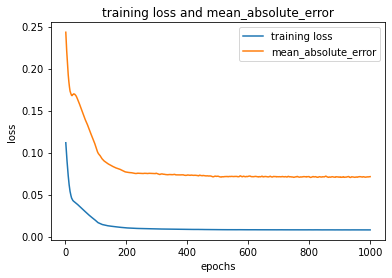

In [15]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , mae , label = 'mean_absolute_error')
plt.title('training loss and mean_absolute_error')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
# Evaluate the model on the test data using `evaluate`

print("Evaluate on test data")
results = model_sub.evaluate(x_val[:10], y_val[:10], callbacks=[tqdm_callback], verbose=0)
print("test loss, test acc:", results)

Evaluate on test data


1/1██████████ ETA: 00:00s - loss: 0.0004 - mean_absolute_error: 0.0182 - mean_squared_error: 0.0004 - root_mean_squared_error: 0.0212

test loss, test acc: [0.00044738082215189934, 0.01815623603761196, 0.00044738082215189934, 0.021151378750801086]


In [17]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model_sub.predict([0.35, 0.67, 0.93])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
predictions shape: (3, 1)


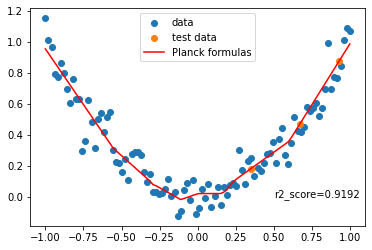

In [18]:
plt.scatter(x, y, label='data')

plt.scatter([0.35, 0.67, 0.93], predictions, label='test data')
plt.plot(x, model_sub.predict(x), color='r', label='Planck formulas')
plt.text(0.5, 0, 'r2_score=%.4f' % r2_score(y, model_sub.predict(x)) )

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y, model_seq.predict(x)))

0.9191896495292095
